**Overview:**

Develop a sophisticated credit card fraud detection system using machine learning techniques to identify potentially fraudulent transactions with high accuracy. The system will leverage the anonymized dataset of European credit card transactions from 2023 to train, validate, and evaluate predictive models.

**Data Preprocessing**

Data Cleaning: Handle missing values and outliers.
Feature Scaling: Normalize or standardize numerical features.
Feature Selection: Identify and select the most relevant features for fraud detection.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/Users/hari/Downloads/creditcard_2023.csv')

# Separate features and target
X = df.drop(columns=['id', 'Class'])
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


**Exploratory Data Analysis (EDA)**

Descriptive Statistics: Summarize data distributions and basic statistics.
Visualization: Create visualizations (e.g., histograms, box plots) to understand the data and identify patterns.
Correlation Analysis: Investigate relationships between features and the target variable (fraudulent transactions).

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.323544e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.197521e-18 -3.838678e-17 -3.198898e-17  2.069287e-17  9.116859e-17   
std    1.000001e+00  1.000001e+00  1.00000

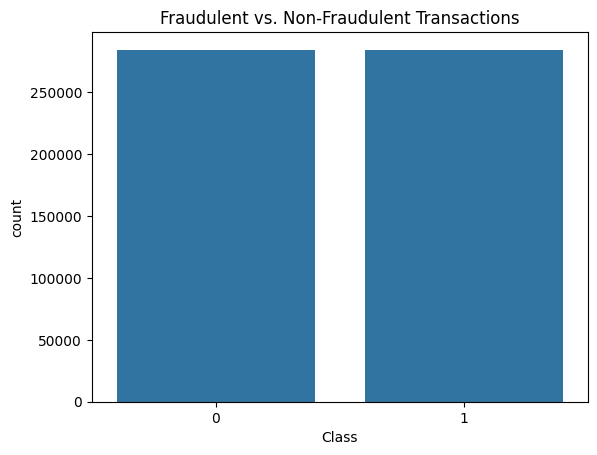

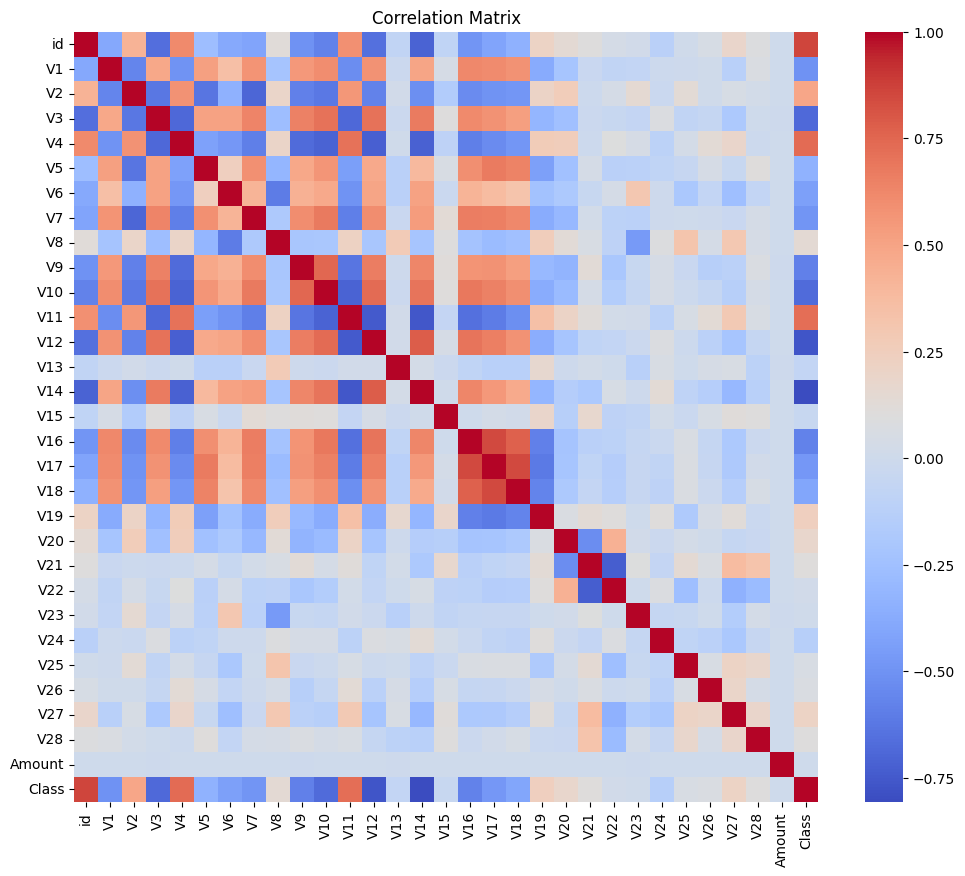

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Visualization of class distribution
sns.countplot(x='Class', data=df)
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Model Development**

Model Selection: Implement and compare various machine learning algorithms such as:
1. Logistic Regression
2. Decision Trees
3. Random Forest
4. Gradient Boosting Machines (GBMs)
5. Neural Networks

Hyperparameter Tuning: Use techniques like Grid Search or Random Search to optimize model parameters.


Confusion Matrix:
 [[85130    19]
 [    0 85440]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


ROC-AUC Score: 0.9998884308682428


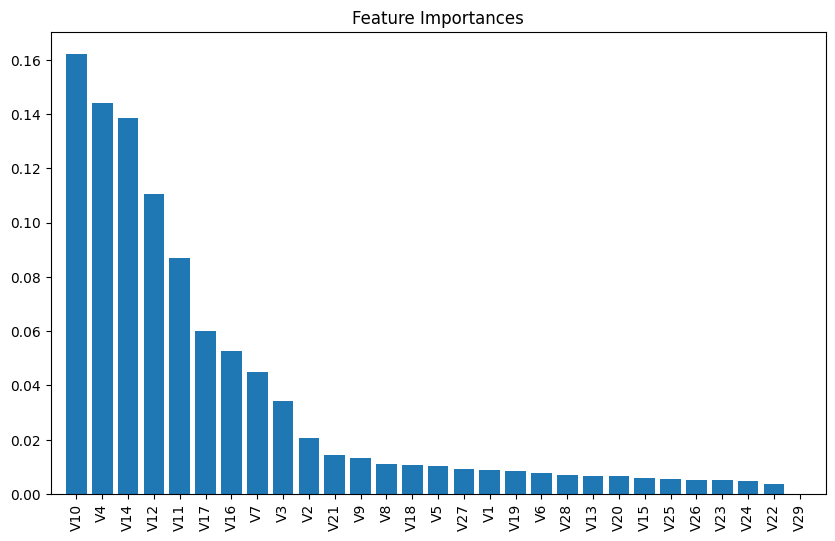

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [f'V{i+1}' for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


**Model Evaluation**

Performance Metrics: Evaluate models using metrics such as Precision, Recall, F1-Score, ROC-AUC, and Confusion Matrix.
Cross-Validation: Apply k-fold cross-validation to ensure the robustness of the model.